# Table of Contents

# Introduction

# Load Packages

In [75]:
import os
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [154]:
import warnings
warnings.filterwarnings("ignore")

# Dataset

## Load Data

In [3]:
data_path = '../data'

In [123]:
movies_df = pd.read_csv(os.path.join(data_path, 'tmdb_5000_movies.csv'))
credits_df = pd.read_csv(os.path.join(data_path, 'tmdb_5000_credits.csv'))

**Movies Dataset (movies_df):**

This dataset contains information about various movies, including their budget, genres, homepage, keywords, original language, title, overview, popularity, production companies, production countries, release date, revenue, runtime, spoken languages, status, tagline, vote average, and vote count.

- `budget`: The budget allocated for the movie production.
- `genres`: The genres of the movie (e.g., action, comedy, drama).
- `homepage`: The URL of the movie's homepage.
- `id`: Unique identifier for the movie.
- `keywords`: The keywords or tags related to the movie.
- `original_language`: The original language of the movie.
- `original_title`: The original title of the movie (before translation or adaptation).
- `overview`: A brief description or summary of the movie.
- `popularity`: A numeric quantity specifying the movie popularity.
- `production_companies`: The production companies involved in making the movie.
- `production_countries`: The countries where the movie was produced.
- `release_date`: The release date of the movie.
- `revenue`: The worldwide revenue generated by the movie.
- `runtime`: The duration of the movie in minutes.
- `spoken_languages`: The languages spoken in the movie.
- `status`: The status of the movie (e.g., Released, Rumored).
- `tagline`: A tagline or slogan associated with the movie.
- `title`: The title of the movie.
- `vote_average`: The average rating given to the movie by users.
- `vote_count`: The number of votes cast for the movie.

**Credits Dataset (credits_df):**

This dataset contains information about movie credits, including the movie ID, title, cast, and crew.

- `movie_id`: Unique identifier for the movie.
- `title`: The title of the movie.
- `cast`: Information about the cast members (e.g., actors, actresses) involved in the movie.
- `crew`: Information about the crew members (e.g., directors, producers, writers) involved in the movie.

These datasets provide valuable insights into the characteristics of movies, their production details, and the people involved in their creation. Analyzing these datasets together can help in understanding factors influencing movie success and building recommendation systems based on movie attributes and credits.

## Data summary

In [13]:
# Check dimensions of the dataset
print("Dimensions of the movies dataset:", movies_df.shape)
print("Dimensions of the credits dataset:", credits_df.shape)

Dimensions of the movies dataset: (4803, 20)
Dimensions of the credits dataset: (4803, 4)


In [14]:
# Display the first few rows of the movies dataset
movies_df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [35]:
# Display the first few rows of the credits dataset
credits_df.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [153]:
(credits_df['movie_id']==movies_df['id']).describe()

count     4803
unique       1
top       True
freq      4803
dtype: object

In [152]:
(credits_df['title']==movies_df['title']).describe()

count     4803
unique       1
top       True
freq      4803
Name: title, dtype: object

Given the findings from the comparisons of this two dataset, we proceeded to merge the two DataFrames, `movies_df` and `credits_df`, using an inner join based on the 'id' and 'title' columns. The merged DataFrame, named `merged_df`, contains information from both DataFrames. Since the 'movie_id' and 'id' columns contained the same values, we dropped the 'movie_id' column after merging to avoid redundancy.

In [124]:
# Merge the two datasets on the 'id' and 'movie_id' columns, and 'title' and 'original_title' columns respectively
merged_df = pd.merge(movies_df, credits_df, left_on=['id', 'title'], right_on=['movie_id', 'title'], how='inner')

# Drop the 'movie_id' column after merging
merged_df.drop(columns=['movie_id'], inplace=True)

In [91]:
# Display the first few rows of the merged dataset
merged_df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [43]:
# Check dimensions of the dataset
print("Dimensions of the dataset after merging:", merged_df.shape)

Dimensions of the dataset after merging: (4803, 22)


In [46]:
# Print information about the DataFrame
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

In [49]:
merged_df.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4.803000e+03,4803.000000,4803.000000,4.803000e+03,4801.000000,4803.000000,4803.000000
mean,2.904504e+07,57165.484281,21.492301,8.226064e+07,106.875859,6.092172,690.217989
std,4.072239e+07,88694.614033,31.816650,1.628571e+08,22.611935,1.194612,1234.585891
min,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,7.900000e+05,9014.500000,4.668070,0.000000e+00,94.000000,5.600000,54.000000
50%,1.500000e+07,14629.000000,12.921594,1.917000e+07,103.000000,6.200000,235.000000
75%,4.000000e+07,58610.500000,28.313505,9.291719e+07,118.000000,6.800000,737.000000
max,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


In [97]:
# Check for missing values
merged_df.isnull().sum()

budget                     0
genres                     0
homepage                3091
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
cast                       0
crew                       0
dtype: int64

In [52]:
# Check for duplicated values
merged_df.duplicated().sum()

0

In this cell, we compute the correlation matrix to explore the relationships between numerical features in the dataset. The correlation matrix helps us identify any significant correlations between variables, which can provide insights into the underlying patterns in the data.

Next, we visualize the correlation matrix using a heatmap plot. This heatmap provides a graphical representation of the correlation coefficients, making it easier to interpret the relationships between variables. The variables with darker color means their correlation is more.

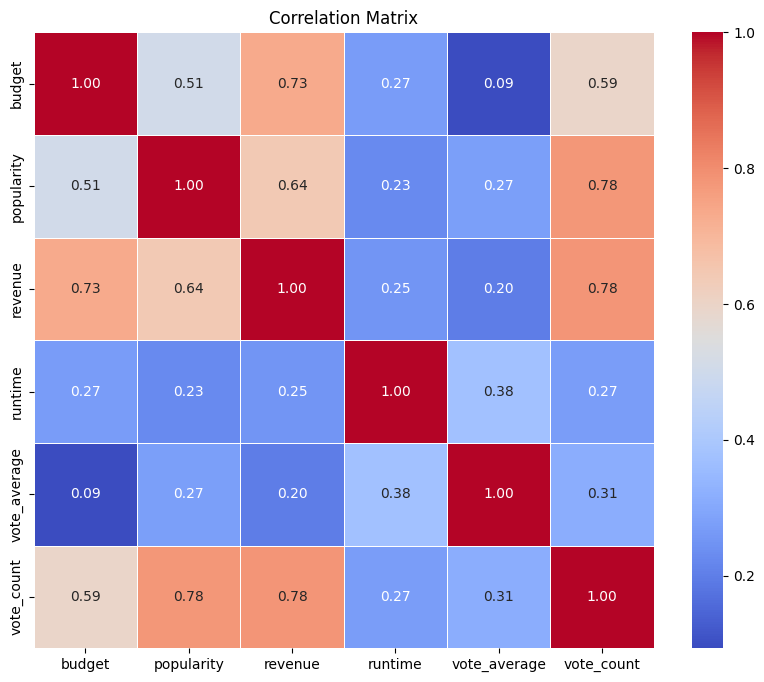

In [61]:
# Select only the numerical columns for correlation analysis
numerical_columns = merged_df.select_dtypes(include=['float64', 'int64'])
numerical_columns.drop(columns=['id'], inplace=True)

# Calculate the correlation matrix
correlation_matrix = numerical_columns.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# Data Cleaning and Preprocessing

## JSON Handling

To handle columns in JSON format (genres, keywords, production_countries, production_companies, spoken_languages, cast, crew), we use the json module in Python to parse the JSON strings into Python objects (lists). 

In [125]:
# Define a function to parse JSON strings
def parse_json(json_string):
    try:
        # If the string is not empty or not '[]', parse it into a Python object
        if pd.notna(json_string) and json_string != '[]':
            return json.loads(json_string)
        else:
            return None
    except json.JSONDecodeError:
        # If there's an error in decoding JSON, return None
        return None

# Apply the parse_json function to columns containing JSON strings
for column in ['genres', 'keywords', 'production_countries', 'production_companies', 'spoken_languages', 'cast', 'crew']:
    merged_df[column] = merged_df[column].apply(parse_json)

# Display the parsed JSON data for the first row
print("Parsed JSON data for the first row:")
for column in ['genres', 'keywords', 'production_countries', 'production_companies', 'spoken_languages', 'cast', 'crew']:
    print(f"{column}: {merged_df[column][0][:5]}", "\n")


Parsed JSON data for the first row:
genres: [{'id': 28, 'name': 'Action'}, {'id': 12, 'name': 'Adventure'}, {'id': 14, 'name': 'Fantasy'}, {'id': 878, 'name': 'Science Fiction'}] 

keywords: [{'id': 1463, 'name': 'culture clash'}, {'id': 2964, 'name': 'future'}, {'id': 3386, 'name': 'space war'}, {'id': 3388, 'name': 'space colony'}, {'id': 3679, 'name': 'society'}] 

production_countries: [{'iso_3166_1': 'US', 'name': 'United States of America'}, {'iso_3166_1': 'GB', 'name': 'United Kingdom'}] 

production_companies: [{'name': 'Ingenious Film Partners', 'id': 289}, {'name': 'Twentieth Century Fox Film Corporation', 'id': 306}, {'name': 'Dune Entertainment', 'id': 444}, {'name': 'Lightstorm Entertainment', 'id': 574}] 

spoken_languages: [{'iso_639_1': 'en', 'name': 'English'}, {'iso_639_1': 'es', 'name': 'Español'}] 

cast: [{'cast_id': 242, 'character': 'Jake Sully', 'credit_id': '5602a8a7c3a3685532001c9a', 'gender': 2, 'id': 65731, 'name': 'Sam Worthington', 'order': 0}, {'cast_id':

In [126]:
# Extract relevant information (names) from parsed JSON data (except cast and crew)
for column in ['genres', 'keywords', 'production_countries', 'production_companies', 'spoken_languages']:
    merged_df[column] = merged_df[column].apply(lambda x: [item['name'] for item in x] if x is not None else None)

# Display the updated columns
print("Updated columns:")
for column in ['genres', 'keywords', 'production_countries', 'production_companies', 'spoken_languages']:
    print(f"{column.capitalize()}: {merged_df[column][0]}")


Updated columns:
Genres: ['Action', 'Adventure', 'Fantasy', 'Science Fiction']
Keywords: ['culture clash', 'future', 'space war', 'space colony', 'society', 'space travel', 'futuristic', 'romance', 'space', 'alien', 'tribe', 'alien planet', 'cgi', 'marine', 'soldier', 'battle', 'love affair', 'anti war', 'power relations', 'mind and soul', '3d']
Production_countries: ['United States of America', 'United Kingdom']
Production_companies: ['Ingenious Film Partners', 'Twentieth Century Fox Film Corporation', 'Dune Entertainment', 'Lightstorm Entertainment']
Spoken_languages: ['English', 'Español']


In [131]:
# Extract names and genders from the cast column
merged_df['cast'] = merged_df['cast'].apply(lambda x: [[member['name'], member['gender']] for member in x] if x is not None else None)

# Extract names, departments, jobs, and genders from the crew column
merged_df['crew'] = merged_df['crew'].apply(lambda x: [[member['name'], member['department'], member['job'], member['gender']] for member in x] if x is not None else None)

# Display the updated columns
print("Updated columns:")
print("Cast:", merged_df['cast'][0][:5])
print("Crew:", merged_df['crew'][0][:5])

Updated columns:
Cast: [['Sam Worthington', 2], ['Zoe Saldana', 1], ['Sigourney Weaver', 1], ['Stephen Lang', 2], ['Michelle Rodriguez', 1]]
Crew: [['Stephen E. Rivkin', 'Editing', 'Editor', 0], ['Rick Carter', 'Art', 'Production Design', 2], ['Christopher Boyes', 'Sound', 'Sound Designer', 0], ['Christopher Boyes', 'Sound', 'Supervising Sound Editor', 0], ['Mali Finn', 'Production', 'Casting', 1]]


## Zero Values

In [138]:
merged_df.apply(lambda x: sum(x==0),axis=0)

budget                  1037
genres                     0
homepage                   0
id                         0
keywords                   0
original_language          0
original_title             0
overview                   0
popularity                 1
production_companies       0
production_countries       0
release_date               0
revenue                 1427
runtime                   35
spoken_languages           0
status                     0
tagline                    0
title                      0
vote_average              63
vote_count                62
cast                       0
crew                       0
dtype: int64

In [148]:
# Set movie budgets with zero values to None
merged_df.loc[merged_df['budget'] == 0, 'budget'] = None

In [145]:
merged_df[(merged_df['budget'] > 0) & (merged_df['budget'] < 1000)]

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew
1095,110,"[Action, Drama, Fantasy]",http://ent.sina.com.cn/hjj/,1494,"[poison, china, martial arts, swordplay, fight...",zh,滿城盡帶黃金甲,During China's Tang dynasty the emperor has ta...,9.950505,[Beijing New Picture Film Co. Ltd.],...,0,114.0,[普通话],Released,Unspeakable secrets are hidden within the Forb...,Curse of the Golden Flower,6.6,203,"[[Chow Yun-fat, 2], [Gong Li, 1], [Jay Chou, 2...","[[Zhang Yimou, Writing, Screenplay, 2], [Zhang..."
1562,30,"[Adventure, Animation, Comedy, Family]",NaN,16340,"[paris, invention]",it,Rugrats in Paris: The Movie,The Rugrats are back! There's Tommy the brave ...,4.590277,"[Paramount Pictures, Nickelodeon Movies, Param...",...,103,78.0,[English],Released,Ooo la la! Paris will never be the same!,Rugrats in Paris: The Movie,6.0,100,"[[E.G. Daily, 1], [Susan Sarandon, 1], [John L...","[[Mark Mothersbaugh, Sound, Music, 2], [J. Dav..."
1771,28,"[Thriller, Action, Comedy, Crime]",NaN,1613,"[chemical, laxative, skinheads]",en,The 51st State,Elmo McElroy is a streetwise American master c...,9.670031,"[Film Council, Alliance Atlantis Communication...",...,14,93.0,[English],Released,Nice Wheels. Dirty Deals. And One Mean Mother ...,The 51st State,5.9,173,"[[Samuel L. Jackson, 2], [Robert Carlyle, 2], ...","[[Alan MacDonald, Art, Production Design, 2], ..."
1912,25,[Drama],NaN,10397,"[emigration, irish-american, hunger, socially ...",en,Angela's Ashes,Based on the best selling autobiography by Iri...,4.887940,"[Paramount Pictures, Universal Pictures]",...,13,145.0,[English],Released,NaN,Angela's Ashes,7.0,59,"[[Emily Watson, 0], [Robert Carlyle, 2], [Joe ...","[[John Williams, Sound, Original Music Compose..."
2617,15,[Comedy],http://www.peeplesmovie.com/,72359,"[duringcreditsstinger, woman director]",en,Peeples,The story follows what happens when a child ps...,5.112809,"[34th Street Films, Homegrown Pictures]",...,0,95.0,[English],Released,NaN,Peeples,5.6,26,"[[Craig Robinson, 2], [Kerry Washington, 1], [...","[[David Moritz, Editing, Editor, 2], [Aaron Zi..."
2715,108,"[Comedy, Horror]",NaN,23988,"[halloween, slapstick, duringcreditsstinger]",en,Stan Helsing,It's Halloween night and video store clerk Sta...,7.410523,[Insight Productions],...,0,90.0,[English],Released,The most feared monsters in cinematic history ...,Stan Helsing,4.0,97,"[[Diora Baird, 1], [Leslie Nielsen, 2], [Steve...","[[Bo Zenga, Directing, Director, 2], [Bo Zenga..."
2933,11,"[Drama, Action]",NaN,28932,None,en,F.I.S.T.,Johnny Kovak joins the Teamsters trade-union i...,3.375208,"[United Artists, chateau productions]",...,11,145.0,[English],Released,NaN,F.I.S.T.,6.4,29,"[[Sylvester Stallone, 2], [Rod Steiger, 2], [P...","[[Joe Eszterhas, Writing, Writer, 0], [Norman ..."
3131,10,"[Drama, Romance, Comedy]",http://hrosss.is/the-film/,217708,"[horse, snow storm, icelandic]",is,Hross í oss,A country romance about the human streak in th...,1.617943,"[Filmhuset Gruppen, Leiknar Myndir]",...,11,85.0,"[English, Íslenska, Pусский, Español, svenska]",Released,NaN,Of Horses and Men,6.9,26,"[[Ingvar Eggert Sigurðsson, 2], [Charlotte Bøv...","[[Friðrik Þór Friðriksson, Production, Produce..."
3137,10,"[Horror, Thriller]",NaN,78383,"[nurse, sexual murder, revenge, lesbian relati...",en,Nurse 3-D,"Abby Russell, a beautiful, dedicated nurse wit...",10.013629,"[Lions Gate, Lions Gate Entertainments]",...,10000000,99.0,[English],Released,Your pain is her pleasure.,Nurse 3-D,4.9,119,"[[Paz de la Huerta, 1], [Katrina Bowden, 1], [...","[[David Loughery, Writing, Writer, 2], [John S..."
3144,10,"[Drama, Action, Comedy, Crime]",NaN,208869,None,en,Plastic,Sam &amp; Fordy run a credit card fraud scheme...,9.702760,[Gateway Films],...,0,102.0,[English],Released,HUSTLE. HEIST. REPEAT.,Plastic,6.1,86,"[[Ed Speleers, 2], [Will Poulter, 2], [Alfie A...","[[Julian

## Released Date

In [134]:
# Convert release_date column to datetime format
merged_df['release_date'] = pd.to_datetime(merged_df['release_date'], format ='%Y-%m-%d')

In [ ]:
# Extract year, month, and day of year from release_date
merged_df['year'] = merged_df['release_date'].dt.year
merged_df['month'] = merged_df['release_date'].dt.month
merged_df['day_of_year'] = merged_df['release_date'].dt.dayofyear

# Display the updated DataFrame
print(merged_df[['release_date', 'year', 'month', 'day_of_year']].head())


## Feature Selection

In [157]:
newCols = ['id','title','release_date','popularity','vote_average','vote_count',
           'budget','revenue','genres','keywords','cast','crew','tagline', 'runtime', 'production_companies', 
           'production_countries', 'status']

df = merged_df[newCols]

In [158]:
# DataFrame information after data preprocessing
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    4803 non-null   int64         
 1   title                 4803 non-null   object        
 2   release_date          4802 non-null   datetime64[ns]
 3   popularity            4803 non-null   float64       
 4   vote_average          4803 non-null   float64       
 5   vote_count            4803 non-null   int64         
 6   budget                3766 non-null   float64       
 7   revenue               4803 non-null   int64         
 8   genres                4775 non-null   object        
 9   keywords              4391 non-null   object        
 10  cast                  4760 non-null   object        
 11  crew                  4775 non-null   object        
 12  tagline               3959 non-null   object        
 13  runtime           

## Missing Values

In [159]:
# Check for missing values after data preprocessing
df.isnull().sum()

id                         0
title                      0
release_date               1
popularity                 0
vote_average               0
vote_count                 0
budget                  1037
revenue                    0
genres                    28
keywords                 412
cast                      43
crew                      28
tagline                  844
runtime                    2
production_companies     351
production_countries     174
status                     0
dtype: int64

In [171]:
df['runtime'] = df['runtime'].fillna(df['runtime'].median())

In [62]:
df.loc[df.overview.isnull()]

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew
2656,15000000,"[{""id"": 18, ""name"": ""Drama""}]",NaN,370980,"[{""id"": 717, ""name"": ""pope""}, {""id"": 5565, ""na...",it,Chiamatemi Francesco - Il Papa della gente,NaN,0.738646,"[{""name"": ""Taodue Film"", ""id"": 45724}]",...,0,NaN,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",Released,NaN,Chiamatemi Francesco - Il Papa della gente,7.3,12,"[{""cast_id"": 5, ""character"": ""Jorge Mario Berg...","[{""credit_id"": ""5660019ac3a36875f100252b"", ""de..."
4140,2,"[{""id"": 99, ""name"": ""Documentary""}]",NaN,459488,"[{""id"": 6027, ""name"": ""music""}, {""id"": 225822,...",en,"To Be Frank, Sinatra at 100",NaN,0.050625,"[{""name"": ""Eyeline Entertainment"", ""id"": 60343}]",...,0,NaN,[],Released,NaN,"To Be Frank, Sinatra at 100",0.0,0,"[{""cast_id"": 0, ""character"": ""Narrator"", ""cred...","[{""credit_id"": ""592b25e4c3a368783e065a2f"", ""de..."
4431,913000,"[{""id"": 99, ""name"": ""Documentary""}]",NaN,292539,[],de,Food Chains,NaN,0.795698,[],...,0,83.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,NaN,Food Chains,7.4,8,[],"[{""credit_id"": ""5470c3b1c3a368085e000abd"", ""de..."


In [93]:
df.loc[df.release_date.isnull()]

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew
4553,0,None,NaN,380097,None,en,America Is Still the Place,1971 post civil rights San Francisco seemed li...,0.0,None,...,0,0.0,None,Released,NaN,America Is Still the Place,0.0,0,None,None


In [168]:
df.loc[df.release_date.isnull()]

,id,title,release_date,popularity,vote_average,vote_count,budget,revenue,genres,keywords,cast,crew,tagline,runtime,production_companies,production_countries,status
4553,380097,America Is Still the Place,NaT,0.0,0.0,0,NaN,0,None,None,None,None,NaN,0.0,None,None,Released


Since the row with the missing release date also has missing values in most other columns, it's reasonable to drop this row from our dataset. This ensures that our analysis is based on complete and reliable data, improving the accuracy of our findings.

In [170]:
# Drop rows with missing values in the 'release_date' column
df = df.dropna(subset=['release_date'])

In [173]:
print("Dimensions of the dataset after data cleaning:", df.shape)

Dimensions of the dataset after data cleaning: (4802, 17)


# Exploratory Data Analysis (EDA)

# Data Modeling

# Evaluation

# Recommender System